# Clase 11: Transformada de Fourier continua, ejemplos integradores
Dado que esta clase tiene bastante ida y vuelta, puede ser útil este notebook, para que queden las ideas juntas y ordenadas en un mismo lugar.
Link al documento de la clase: https://docs.google.com/document/d/1woVXuQVpyigh_XzEVs3mQKYeKUbavlHVWuRwG5mfFuM/edit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Creo un seno de 2 Hz, que comience y termine en el mismo punto, para no generar problema en la FFT

(-3.0, 3.0, -0.1, 1.0)

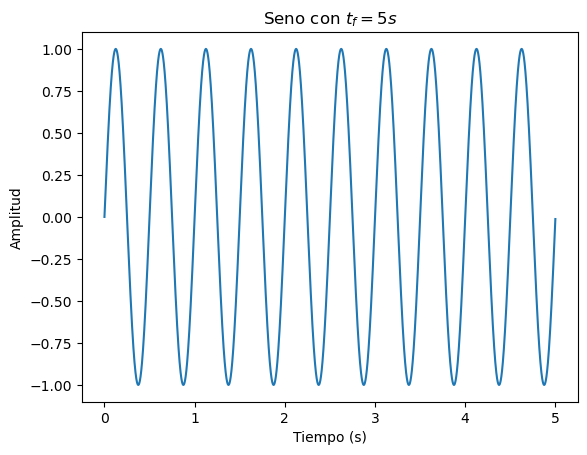

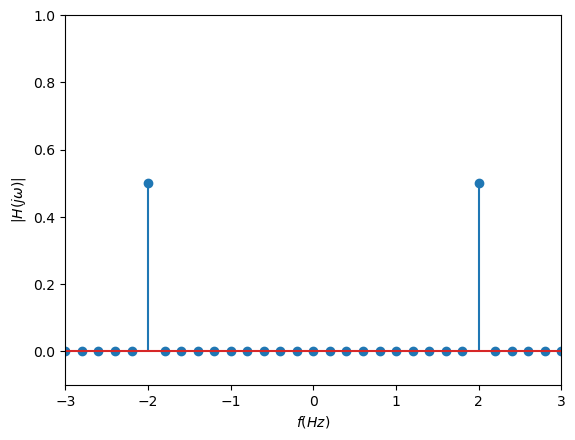

In [19]:
f = 2
tf = 5    # Me defino el tiempo final del vector en 5s, el ti = 0 lo dejo fijo en 0s

h = 0.001    # Paso del vector de tiempo
t_comp = np.arange(0, tf, h)

s_comp = np.sin(2*np.pi*f*t_comp)

plt.figure()
plt.plot(t_comp, s_comp)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Seno con $t_{f} = ' + str(tf) + 's$')

# Calculo de la transformada rapida de Fourier
S_comp = np.fft.fft(s_comp)/len(s_comp)   # FFT del seno, ventana rectangular, tf = 5
freq = np.fft.fftfreq(len(t_comp), d = h)    # Notar que el eje de frecuencia depende solo de t, no de la se;al que estoy transformando

plt.figure()
plt.stem(freq, np.abs(S_comp))
plt.xlabel('$f(Hz)$')
plt.ylabel('$|H(j\omega)|$')
plt.axis([-3, 3, -0.1, 1])

Se puede ver que la FFT arroja el resultado esperado.
Duda: si siempre estoy convolucionando con un senoc, por que aca no afecta en nada? es porque la se;al comienza y termina exactamente en el mismo punto?

Ahora voy a cambiar el tiempo final para que me quede el ultimo ciclo incompleto,
es decir que el $t_{i}$ sea distinto a $t_{f}$.

(-8.0, 8.0, -0.1, 1.0)

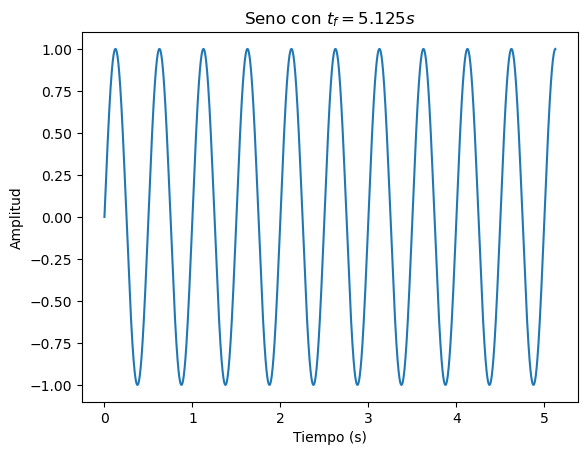

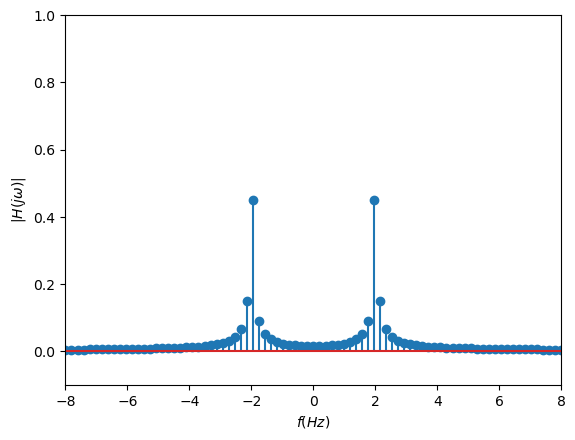

In [20]:
tf = 5.125

t = np.arange(0, tf, h)
s = np.sin(2*np.pi*f*t)     # Ahora el ultimo ciclo del seno quedo cortado

plt.figure()
plt.plot(t, s)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Seno con $t_{f} = ' + str(tf) + 's$')

S = np.fft.fft(s)/len(s)   # FFT del seno, ventana rectangular, tf = 5
freq = np.fft.fftfreq(len(t), d = h)    # Mientras mantenga el t puedo seguir usando el mismo eje de frecuencias

#TODO que el eje de frecuencia sea un linspace, y el shift se haga sobre el eje y

plt.figure()
plt.stem(freq, np.abs(S))
plt.xlabel('$f(Hz)$')
plt.ylabel('$|H(j\omega)|$')
plt.axis([-8, 8, -0.1, 1])

Se puede ver claramente la aparicion de ruido sobre las componentes de la frecuencia fundamental del seno.


## Ventanas
A continuacion, se muestran algunas ventanas comunmente usadas, en el dominio del tiempo y frecuencia: Hamming, Hann, Blackman.

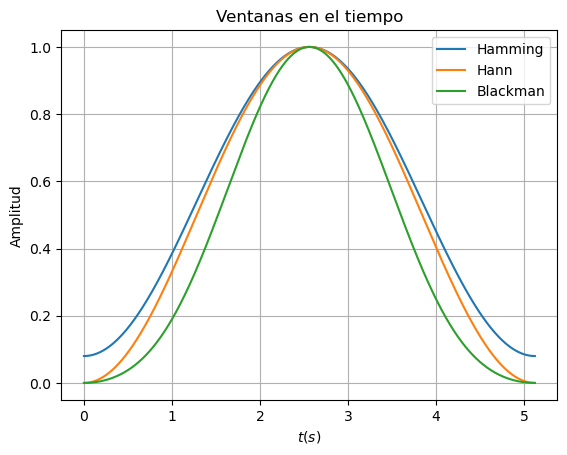

In [24]:
# Ventanas en el tiempo

# Hamming
hamming = np.hamming(len(t))

# Hann
hann = np.hanning(len(t))

# Blackman
blackman = np.blackman(len(t))

plt.figure()
plt.plot(t, hamming)
plt.plot(t, hann)
plt.plot(t, blackman)
plt.xlabel('$t(s)$')
plt.ylabel('Amplitud')
plt.legend(['Hamming', 'Hann', 'Blackman'])
plt.title('Ventanas en el tiempo')
plt.grid()

(-2.0, 2.0, 0.0, 0.6)

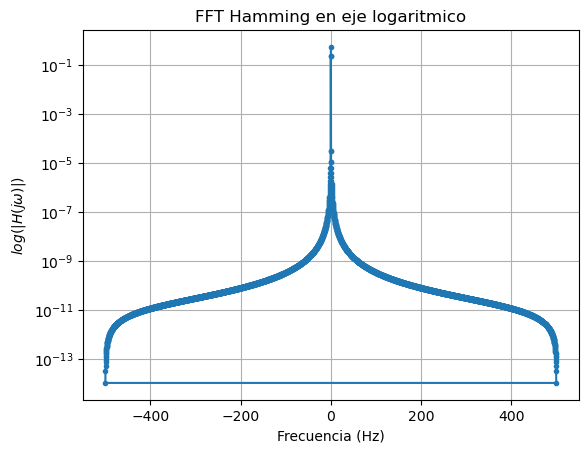

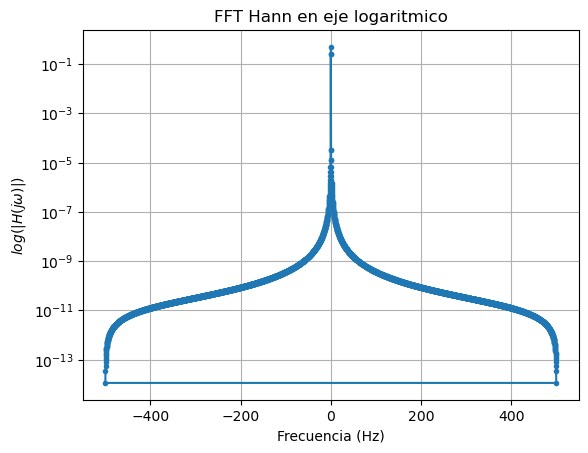

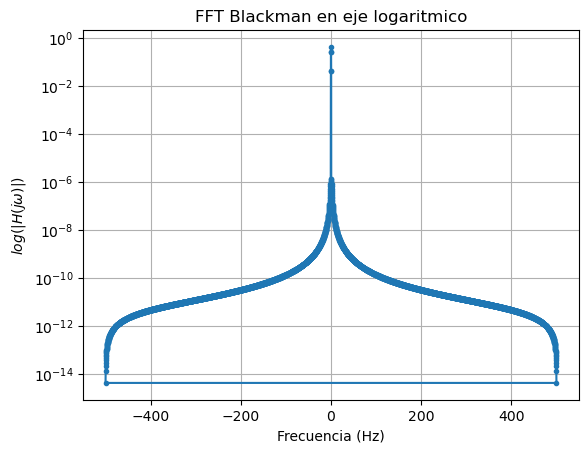

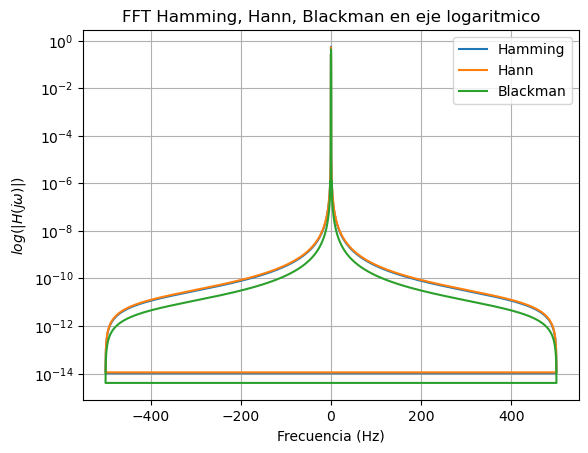

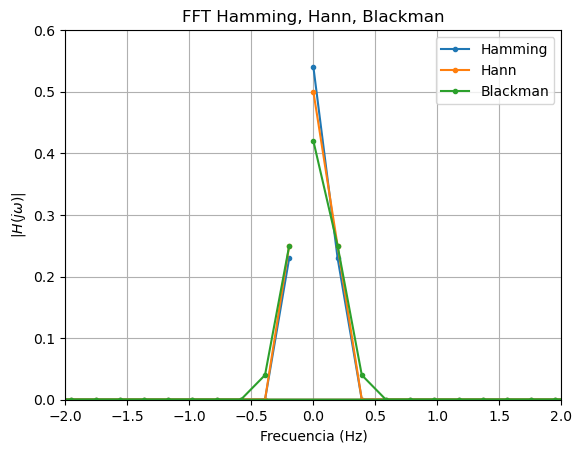

In [26]:
# Ventanas en frecuencia

HM = np.fft.fft(hamming)/len(hamming)   # FFT de la ventana de Hamming

HAN = np.fft.fft(hann)/len(hann)   # FFT de la ventana de Hann

BL = np.fft.fft(blackman)/len(blackman)   # FFT de la ventana de Blackman

plt.figure()
plt.semilogy(freq, np.abs(HM),'.-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$log(|H(j\omega)|)$')
plt.title('FFT Hamming en eje logaritmico')
plt.grid()

plt.figure()
plt.semilogy(freq, np.abs(HAN), '.-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$log(|H(j\omega)|)$')
plt.title('FFT Hann en eje logaritmico')
plt.grid()

plt.figure()
plt.semilogy(freq, np.abs(BL), '.-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$log(|H(j\omega)|)$')
plt.title('FFT Blackman en eje logaritmico')
plt.grid()

# Grafico conjunto en ejes logaritmicos
plt.figure()
plt.semilogy(freq, np.abs(HM))
plt.semilogy(freq, np.abs(HAN))
plt.semilogy(freq, np.abs(BL))
plt.legend(['Hamming', 'Hann', 'Blackman'])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$log(|H(j\omega)|)$')
plt.title('FFT Hamming, Hann, Blackman en eje logaritmico')
plt.grid()

# Grafico conjunto en ejes normales
plt.figure()
plt.plot(freq, np.abs(HM), '.-')
plt.plot(freq, np.abs(HAN), '.-')
plt.plot(freq, np.abs(BL), '.-')
plt.legend(['Hamming', 'Hann', 'Blackman'])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$|H(j\omega)|$')
plt.title('FFT Hamming, Hann, Blackman')
plt.grid()
plt.axis([-2, 2, 0, 0.6])

Duda: comparar con una rectangular? como construirla? solo una constante en 1?

Ahora aplico las ventanas en el tiempo

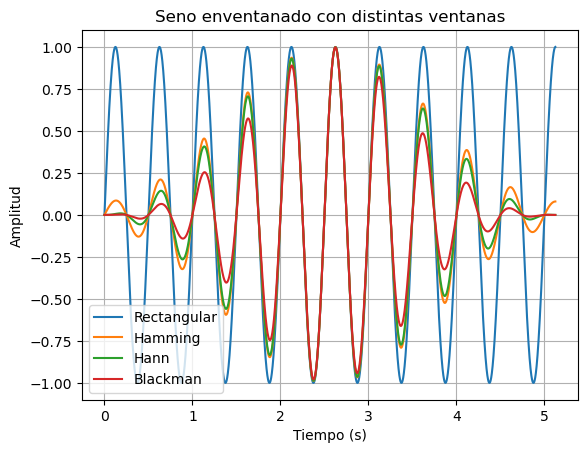

In [28]:
s_ham = s*hamming
s_hann = s*hann
s_bl = s*blackman

plt.figure()
plt.plot(t, s)
plt.plot(t, s_ham)
plt.plot(t, s_hann)
plt.plot(t, s_bl)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(['Rectangular','Hamming', 'Hann', 'Blackman'])
plt.title('Seno enventanado con distintas ventanas')
plt.grid()


#TODO Hacer otra grafica con mas periodos para mostrar que el enventanado afecta principalmente los periodos del principio y final


Ahora voy a analizar en frecuencia las señales enventanadas.

(-5.0, 5.0, 0.0, 0.6)

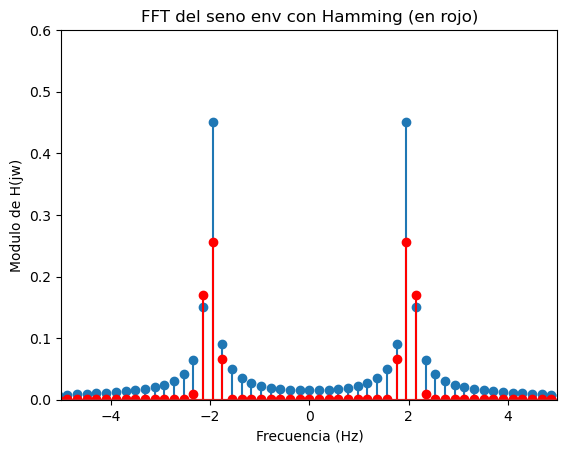

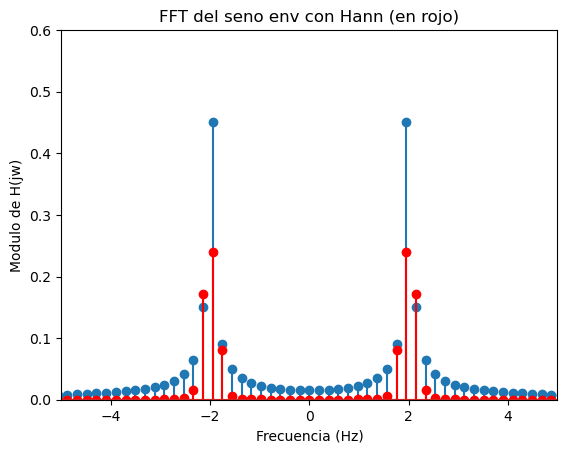

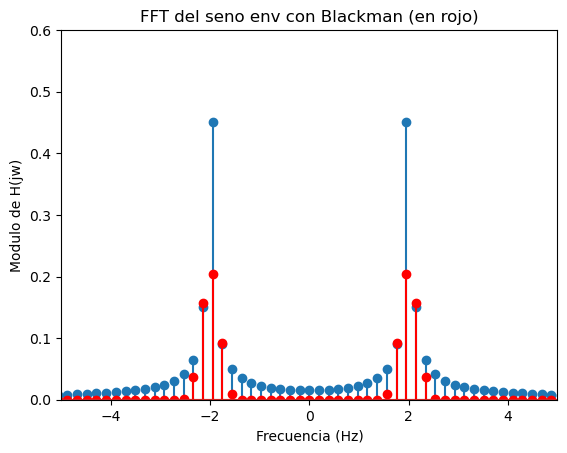

In [29]:
S_ham = np.fft.fft(s_ham)/len(s_ham)   # FFT de la se;al enventanada con Hamming
S_hann = np.fft.fft(s_hann)/len(s_hann)   # FFT de la se;al enventanada con Hamming
S_bl = np.fft.fft(s_bl)/len(s_bl)   # FFT de la se;al enventanada con Hamming


plt.figure()
plt.stem(freq, np.abs(S))
plt.stem(freq, np.abs(S_ham), linefmt='red', markerfmt='ro')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Modulo de H(jw)')
plt.title('FFT del seno env con Hamming (en rojo)')
plt.axis([-5, 5, 0, 0.6])
plt.grid()

plt.figure()
plt.stem(freq, np.abs(S))
plt.stem(freq, np.abs(S_hann), linefmt='red', markerfmt='ro')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Modulo de H(jw)')
plt.title('FFT del seno env con Hann (en rojo)')
plt.axis([-5, 5, 0, 0.6])
plt.grid()

plt.figure()
plt.stem(freq, np.abs(S))
plt.stem(freq, np.abs(S_bl), linefmt='red', markerfmt='ro')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Modulo de H(jw)')
plt.title('FFT del seno env con Blackman (en rojo)')
plt.axis([-5, 5, 0, 0.6])

Se puede ver que todas las ventanas tuvieron un efecto positivo, ya que hicieron que el espectro de la señal transformada, fuera más parecido al teórico del seno.